<h1><center>K-Means Clustering</center></h1>

In this notebook, we will use the simplest models for clustering: **K-Means clustering**.Despite its simplicity, it is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**.

Some real-world applications of k-means:

-   Customer segmentation
-   Understand what the visitors of a website are trying to accomplish
-   Pattern recognition
-   Machine learning
-   Data compression


In this notebook we practice k-means clustering with 2 examples:

-   k-means on a random generated dataset
-   Using k-means for customer segmentation

In [24]:
# import libs
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

<h1 id="random_generated_dataset">k-Means on a randomly generated dataset</h1>
Lets create our own dataset for this lab!


In [25]:
#set up a random seed. 
np.random.seed(0)

# More information: https://pynative.com/python-random-seed/

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>

<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [26]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

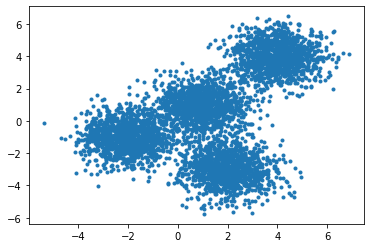

In [27]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

<h2 id="setting_up_K_means">Setting up K-Means</h2>
Now that we have our random data, let's set up our K-Means Clustering.


The KMeans class has many parameters that can be used, but we will be using these three:

<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.


In [28]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [29]:
# Fit the KMeans model with the feature matrix we created above : X 
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
# Grab the labels for each point in the model
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

In [31]:
# Get the coordinates of the cluster centers
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

<h2 id="creating_visual_plot">Creating the Visual Plot</h2>
So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!


In [32]:
def plotMyData(kmeans_labels,kmeans_cluster_centers):

    # Initialize the plot with the specified dimensions.
    fig = plt.figure(figsize=(6, 4))

    # Colors uses a color map, which will produce an array of colors based on
    # the number of labels there are. We use set(k_means_labels) to get the
    # unique labels.
    colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans_labels))))

    # Create a plot
    ax = fig.add_subplot(1, 1, 1)

    # For loop that plots the data points and centroids.
    # k will range from 0-3, which will match the possible clusters that each
    # data point is in.
    for k, col in zip(range(len(kmeans_cluster_centers)), colors):

        # Create a list of all data points, where the data poitns that are 
        # in the cluster (ex. cluster 0) are labeled as true, else they are
        # labeled as false.
        my_members = (kmeans_labels == k)

        # Define the centroid, or cluster center.
        cluster_center = kmeans_cluster_centers[k]

        # Plots the datapoints with color col.
        ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

        # Plots the centroids with specified color, but with a darker outline
        ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

    # Title of the plot
    ax.set_title('KMeans')

    # Remove x-axis ticks
    ax.set_xticks(())

    # Remove y-axis ticks
    ax.set_yticks(())

    # Show the plot
    plt.show()

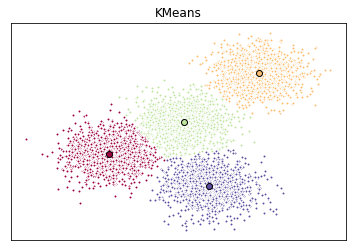

In [33]:
plotMyData(k_means_labels,k_means_cluster_centers)

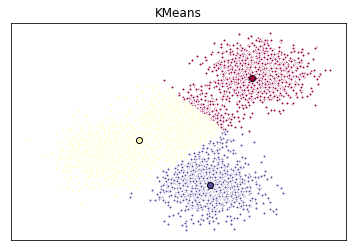

In [34]:
# Try for 3 clusters
k_means2 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means2.fit(X)
k_means_labels2 = k_means2.labels_
k_means_cluster_centers2 = k_means2.cluster_centers_
plotMyData(k_means_labels2,k_means_cluster_centers2)

<h1 id="customer_segmentation_K_means">Customer Segmentation with K-Means</h1>
Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.

Lets download the dataset from IBM Object Storage:
https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/Cust_Segmentation.csv


Load Data From CSV File

In [35]:
# Load Data From CSV File
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2

<h2 id="pre_processing">Pre-processing</h2
    
As we can see, **Address** in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.


In [36]:
df = cust_df.drop('Address', axis=1)
df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  
0        0.0              6.3  
1        0.0             12.8  
2        1.0             20.9  
3        0.0              6.3  
4        0.0              7.2

#### Normalizing over the standard deviation

Now let's normalize the dataset. 

But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.


In [37]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:] #we don't use customer id
X = np.nan_to_num(X)
normalize = StandardScaler().fit(X)
Clus_dataSet = normalize.transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

<h2 id="modeling">Modeling</h2>

In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Lets apply k-means on our dataset, and take look at cluster labels.


#### Elbow method

First of all, we will find out the cluster number with the **elbow method**:

The Elbow method is a very popular technique and the idea is to run k-means clustering for a range of clusters k (let’s say from 1 to 10) and for each value, we are calculating the sum of squared distances from each point to its assigned center(distortions).

When the distortions are plotted and the plot looks like an arm then the “elbow”(the point of inflection on the curve) is the best value of k.

In [38]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
    kmeanModel.fit(Clus_dataSet)
    distortions.append(kmeanModel.inertia_)

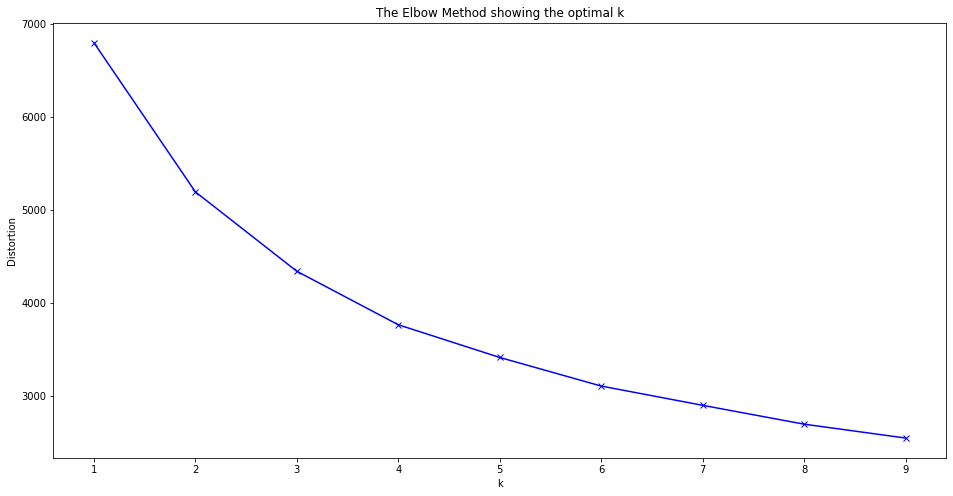

In [39]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# more information: https://predictivehacks.com/k-means-elbow-method-code-for-python/ 

We can observe that the “elbow” can be at the number 4 which seems optimal for this case. Now we will run a K-Means using as **n_clusters the number 3** for the purpose of this course (not a bad choice). 

In [40]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[0 1 2 0 1 1 0 0 0 1 2 0 0 0 2 0 0 0 1 0 0 0 2 1 1 0 0 0 0 0 0 1 2 0 0 0 2
 2 0 1 2 1 0 1 0 1 0 0 0 0 1 1 2 0 2 2 2 0 0 0 1 0 1 1 0 0 0 2 0 2 0 0 0 0
 0 0 0 0 1 0 0 2 1 0 1 0 0 0 2 2 0 0 2 2 0 0 0 0 2 0 2 1 0 2 2 1 0 0 0 0 0
 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 1 0 0 2
 0 0 0 1 2 0 0 0 0 1 2 2 0 1 0 0 0 0 0 0 0 0 1 0 0 2 0 2 0 0 2 1 2 0 0 1 2
 1 0 0 0 0 0 1 0 2 0 0 0 1 1 0 1 0 2 0 0 2 0 1 0 2 0 0 0 0 0 2 2 1 0 0 2 1
 0 0 0 0 1 0 0 2 0 0 0 0 1 0 0 2 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 2 0 2 0
 0 0 1 0 2 1 2 0 1 0 0 2 0 0 0 0 2 2 2 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 2 0 0
 2 0 2 1 0 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 2 0 2 1 0 2 0 0 0 2 2 0 0 0 1 2
 0 0 2 0 1 0 0 0 0 0 2 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 2 0 2 0 0 0 1 1 0
 2 0 1 2 2 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 2 0 2 0 0 0 1 0 0 0 0 2 0 0 2 2
 1 0 0 0 0 0 2 2 0 1 2 1 0 0 2 0 0 1 1 0 2 0 0 1 0 2 0 1 0 0 0 1 0 0 0 0 1
 0 2 0 0 0 0 1 2 0 0 1 0 2 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 2 0 0 0 2 0
 2 0 0 0 0 0 1 2 2 0 1 0 

<h2 id="insights">Insights</h2>
We assign the labels to each row in dataframe.


In [41]:
df["Clus_km"] = labels
df.head(5)

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  Clus_km  
0        0.0              6.3        0  
1        0.0             12.8        1  
2        1.0             20.9        2  
3        0.0              6.3        0  
4        0.0              7.2        1

We can easily check the centroid values by averaging the features in each cluster.


In [42]:
df.groupby('Clus_km').mean()

Customer Id        Age       Edu  Years Employed      Income  \
Clus_km                                                                 
0         426.122905  33.817505  1.603352        7.625698   36.143389   
1         424.408163  43.000000  1.931973       17.197279  101.959184   
2         424.451807  31.891566  1.861446        3.963855   31.789157   

         Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Clus_km                                                     
0         0.853128    1.816855   0.000000         7.964991  
1         4.220673    7.954483   0.162393        13.915646  
2         1.576675    2.843355   0.993939        13.994578

Now, lets look at the distribution of customers based on their age and income:


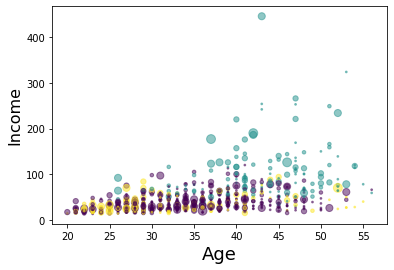

In [43]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


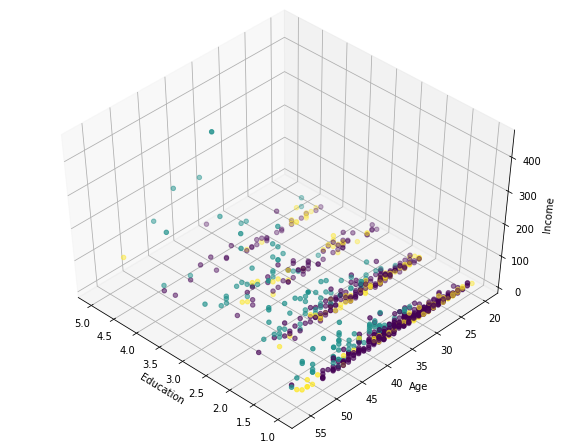

In [44]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically. Now we can create a profile for each group, considering the common characteristics of each cluster. For example, the 3 clusters can be:

-   AFFLUENT, EDUCATED AND OLD AGED
-   MIDDLE AGED AND MIDDLE INCOME
-   YOUNG AND LOW INCOME

### Predict for an unknow customer

In [45]:
# if you need to get a 2D array to use for k_means use reshape(1, -1)

newCustomer=np.array([[22.   ,  3.   , 8.   , 37.   ,  3.111,  2.802,  1.   , 10.9  ]])
sampleNorm=normalize.transform(newCustomer)
print(newCustomer)
print(sampleNorm)


[[22.     3.     8.    37.     3.111  2.802  1.    10.9  ]]
[[-1.62123904  1.39059423 -0.08353869 -0.25117342  0.72210556 -0.08148052
   1.90913822  0.10845868]]


In [46]:
k_means.predict(sampleNorm)

array([2])

This customer will be place in the cluster 3 i.e "YOUNG AND LOW INCOME"